In [1]:
import gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path  import join
import tensorflow as tf
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras import regularizers
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
training_images_path = "/Users/utkarsh/Downloads/MNIST/train-images-idx3-ubyte.gz"
training_labels_path = "/Users/utkarsh/Downloads/MNIST/train-labels-idx1-ubyte.gz"
 
train_images_byte = gzip.open(training_images_path,'r')
image_size = 28
sample_size = 60000 
train_images_byte.read(16)
buf = train_images_byte.read(image_size * image_size * sample_size)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)

"""print(np.array2string(data, threshold=np.inf, edgeitems=np.inf))
print(data.reshape(28,28)) 
reshaped_arr = data.reshape(28, 28)
for row in reshaped_arr:
    print(' '.join([str(elem) for elem in row]))"""

images = data.reshape(sample_size, image_size, image_size, 1)
# print(np.array2string(images, threshold=np.inf, edgeitems=np.inf))
train_labels_byte = gzip.open(training_labels_path,'r')
train_labels_byte.read(8)
buf = train_labels_byte.read(sample_size)
labels = np.frombuffer(buf, dtype=np.uint8)

In [3]:
def show_images(images, labels):
     
    cols = 5
    rows = int(len(images)/cols) + 1
     
    plt.figure(figsize=(10,7))
    index = 1   
     
    for x in zip(images, labels):        
        image = x[0]        
        label = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray, )
        plt.axis('off')
        # plt.title(label);        
        index += 1


In [4]:
"""

Process: (1) Get all the Datasets, their X and Y as numpy array

"""

'\n\nProcess: (1) Get all the Datasets, their X and Y as numpy array\n\n'

In [5]:
# print(np.array2string(data, threshold=np.inf, edgeitems=np.inf))
img_data = np.reshape(data, (sample_size, image_size**2))
lbl_data = labels

In [6]:
X = img_data
y = lbl_data


In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

In [8]:
checkpoint_path = "training_1/cp.ckpt"
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)
model_ckpt = callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    save_weights_only=True,
    verbose=True)

In [9]:
model = Sequential(
    [
        # layers.Dropout(0.3),
        Dense(100, activation='relu', input_shape=[784]),
        # layers.Dropout(0.3),
        Dense(100, activation='relu'),
        # layers.Dropout(0.3),
        Dense(100, activation='relu'),
        #layers.Dropout(0.3),
        Dense(10, activation='linear')
    ]
)

In [10]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.legacy.Adam(0.0005),
)

In [11]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    epochs=500,
    callbacks=[early_stopping, model_ckpt],
)

Epoch 1/500
1472/1500 [============================>.] - ETA: 0s - loss: 1.6026
Epoch 1: saving model to training_1/cp.ckpt
1500/1500 [==============================] - 2s 1ms/step - loss: 1.5825 - val_loss: 0.4741
Epoch 2/500
1474/1500 [============================>.] - ETA: 0s - loss: 0.3121
Epoch 2: saving model to training_1/cp.ckpt
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3126 - val_loss: 0.2707
Epoch 3/500
1476/1500 [============================>.] - ETA: 0s - loss: 0.2146
Epoch 3: saving model to training_1/cp.ckpt
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2157 - val_loss: 0.2304
Epoch 4/500
1468/1500 [============================>.] - ETA: 0s - loss: 0.1679
Epoch 4: saving model to training_1/cp.ckpt
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1670 - val_loss: 0.2243
Epoch 5/500
1452/1500 [============================>.] - ETA: 0s - loss: 0.1463
Epoch 5: saving model to training_1/cp.ckpt
1500/1500 [=====

Minimum Validation Loss: 0.1614


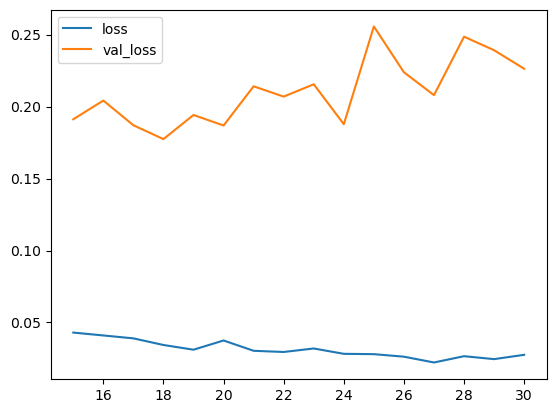

In [12]:
history_df = pd.DataFrame(history.history)
history_df.loc[15:, ['loss', 'val_loss']].plot()
print("Minimum Validation Loss: {:0.4f}".format(history_df['val_loss'].min()));

Testing the data now

In [13]:
testing_images_path = "/Users/utkarsh/Downloads/MNIST/t10k-images-idx3-ubyte.gz"
testing_labels_path = "/Users/utkarsh/Downloads/MNIST/t10k-labels-idx1-ubyte.gz"
test_images_byte = gzip.open(training_images_path,'r')
image_size = 28
sample_size = 10000 
test_images_byte.read(16)
buf = test_images_byte.read(image_size * image_size * sample_size)
data = np.frombuffer(buf, dtype=np.uint8).astype(np.float32)
images = data.reshape(sample_size, image_size, image_size, 1)

test_labels_byte = gzip.open(training_labels_path,'r')
test_labels_byte.read(8)
buf = test_labels_byte.read(sample_size)
labels = np.frombuffer(buf, dtype=np.uint8)
img_data = np.reshape(data, (sample_size, image_size**2))
lbl_data = labels

In [14]:
X_test = img_data
y_test = labels

In [15]:
X_test[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [16]:
y_a = model.predict(X_test)
print(X_test.shape)
y_an = tf.nn.softmax(y_a)
y_ans = np.zeros(len(y_an))
print(len(y_an))

313/313 [==============================] - 0s 545us/step
(10000, 784)
10000


In [17]:
for i in range (len(y_an)):
    y_ans[i] = int(np.argmax(y_an[i]))

In [18]:
c = 0
for i in range (10000):
    if y_ans[i] == y_test[i]:
        c+=1
print(c/100)

98.34


In [19]:
import subprocess 
subprocess.run("pbcopy", text=True, input=str(model.weights))

CompletedProcess(args='pbcopy', returncode=0)

In [20]:
im = Image.open(r"img.png")
im = im.resize((30,30)).crop((2, 2, 28, 28)).resize((28,28))
im = im.convert("L")
im = np.array(im)
im.reshape(1,-1)

y_a = model.predict(im)
y_an = tf.nn.softmax(y_a)
y_ans = np.zeros(len(y_an))
print(len(y_an))

ValueError: in user code:

    File "/Users/utkarsh/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "/Users/utkarsh/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/utkarsh/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/utkarsh/anaconda3/lib/python3.10/site-packages/keras/src/engine/training.py", line 2283, in predict_step
        return self(x, training=False)
    File "/Users/utkarsh/anaconda3/lib/python3.10/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/utkarsh/anaconda3/lib/python3.10/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 784), found shape=(None, 28)
